In [1]:
import sys
sys.path.append('../..')

from helpers.helpers import load_matches_df

matches = load_matches_df()

### There are not so much teams and players, who played way a lot. So we can add them as dummy features, because they should be much stronger, than others

In [2]:
from collections import Counter

players_columns = ['player_{}_account_id'.format(n) for n in range(0,10)]
teams_columns = ['radiant_team_id', 'dire_team_id']

players, teams = [], []

players_ids = [player_id for col in players_columns for player_id in matches[col].values]
teams_ids = [team_id for col in teams_columns for team_id in matches[col].values]

players_counts = Counter(players_ids).most_common()
teams_counts = Counter(teams_ids).most_common()

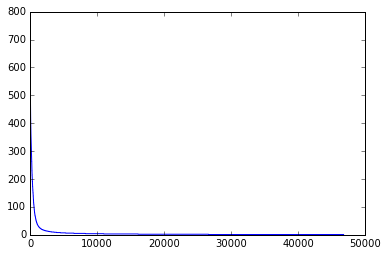

In [13]:
import matplotlib.pyplot as plt

plt.plot([c[1] for c in players_counts])
plt.show()

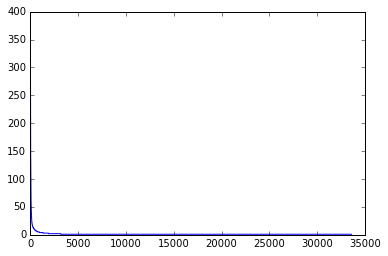

In [14]:
plt.plot([c[1] for c in teams_counts])
plt.show()

### It is much easier to win for radiant, than for dire

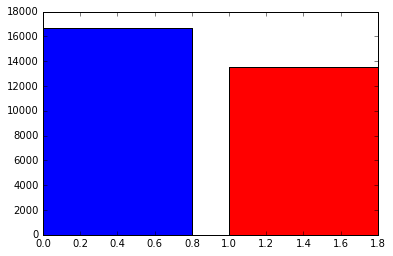

In [23]:
radiant_wins = matches['radiant_win'].sum()
dire_wins = matches.shape[0] - radiant_wins

plt.bar(0, radiant_wins, label='Radiant wins')
plt.bar(1, dire_wins, label='Dire wins', color='r')
plt.show()

In [25]:
radiant_wins_percents = (radiant_wins / matches.shape[0]) * 100
dire_wins_percents = (dire_wins / matches.shape[0]) * 100

print(radiant_wins_percents, dire_wins_percents)

55.2750851887 44.7249148113


### There are some synergies among pairs of heroes. We can see it by vizualizing joint wins and joint looses

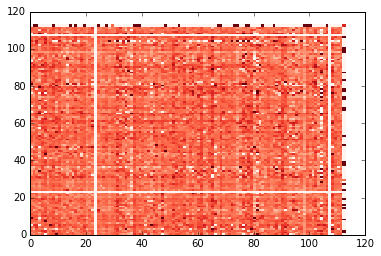

In [3]:
import matplotlib.pyplot as plt
from preprocess.heatmap import get_joint_wins

joint_wins = get_joint_wins(matches)

plt.pcolor(joint_wins, cmap=plt.cm.Reds)
plt.show()

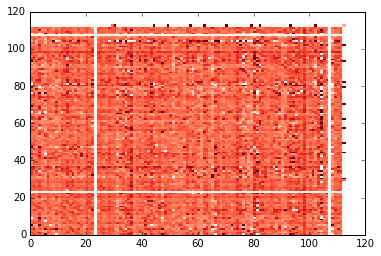

In [4]:
import matplotlib.pyplot as plt
from preprocess.heatmap import get_joint_looses

joint_looses = get_joint_looses(matches)

plt.pcolor(joint_looses, cmap=plt.cm.Reds)
plt.show()